# EGS master catalogue

This notebook presents the merge of the various pristine catalogues to produce HELP mater catalogue on EGS.

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000) [with local modifications]
This notebook was executed on: 
2018-02-07 21:53:28.239632


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

import os
import time

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Column, Table
import numpy as np
from pymoc import MOC

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp_internal.utils import coords_to_hpidx, ebv, gen_help_id, inMoc

In [3]:
TMP_DIR = os.environ.get('TMP_DIR', "./data_tmp")
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))

try:
    os.makedirs(OUT_DIR)
except FileExistsError:
    pass

## I - Reading the prepared pristine catalogues

In [4]:
aegis = Table.read("{}/AEGIS.fits".format(TMP_DIR))
candels = Table.read("{}/CANDELS-EGS.fits".format(TMP_DIR))
wirds = Table.read("{}/CFHT-WIRDS.fits".format(TMP_DIR))
cfhtls_wide = Table.read("{}/CFHTLS-WIDE.fits".format(TMP_DIR))
cfhtls_deep = Table.read("{}/CFHTLS-DEEP.fits".format(TMP_DIR))
cfhtlens = Table.read("{}/CFHTLENS.fits".format(TMP_DIR))
deep = Table.read("{}/DEEP2.fits".format(TMP_DIR))
irac = Table.read("{}/IRAC-EGS.fits".format(TMP_DIR))
hsc = Table.read("{}/HSC.fits".format(TMP_DIR))
ps1 = Table.read("{}/PS1.fits".format(TMP_DIR))
legacy = Table.read("{}/LegacySurvey.fits".format(TMP_DIR))
uhs = Table.read("{}/UHS.fits".format(TMP_DIR))

## II - Merging tables

We first merge the optical catalogues and then add the infrared ones.

At every step, we look at the distribution of the distances to the nearest source in the merged catalogue to determine the best crossmatching radius.

### HSC

In [5]:
master_catalogue = hsc
master_catalogue['hsc_ra'].name = 'ra'
master_catalogue['hsc_dec'].name = 'dec'

### Add PanSTARRS

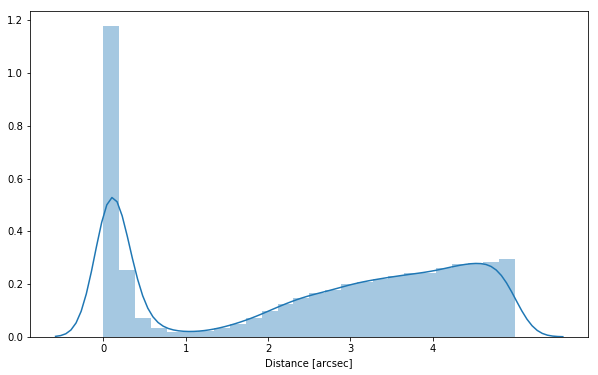

In [6]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(ps1['ps1_ra'], ps1['ps1_dec'])
)

In [7]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, ps1, "ps1_ra", "ps1_dec", radius=0.8*u.arcsec)

### AEGIS

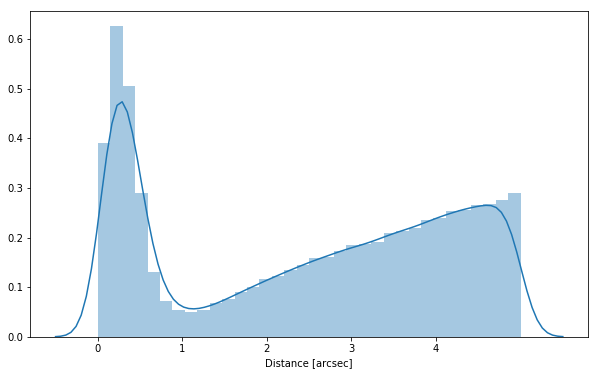

In [8]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(aegis['aegis_ra'], aegis['aegis_dec'])
)

In [9]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, aegis, "aegis_ra", "aegis_dec", radius=0.8*u.arcsec)

### CANDELS

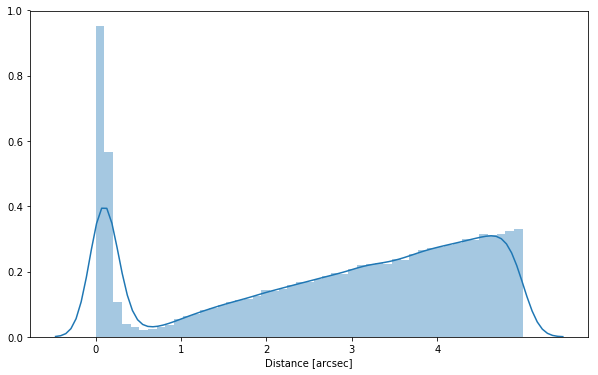

In [10]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(candels['candels-egs_ra'], candels['candels-egs_dec'])
)

In [11]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, candels, "candels-egs_ra", "candels-egs_dec", radius=0.8*u.arcsec)

### CFHT-WIRDS

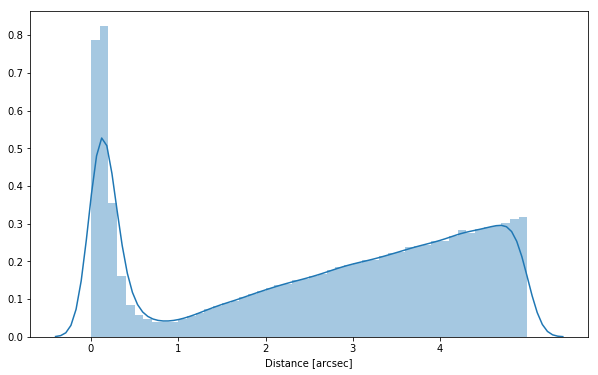

In [12]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(wirds['wirds_ra'], wirds['wirds_dec'])
)

In [13]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, wirds, "wirds_ra", "wirds_dec", radius=0.8*u.arcsec)

### CFHTLS-WIDE

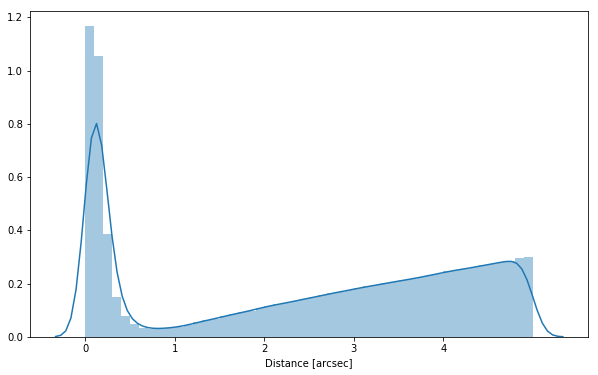

In [14]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(cfhtls_wide['cfhtls-wide_ra'], cfhtls_wide['cfhtls-wide_dec'])
)

In [15]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, 
                                    cfhtls_wide, 
                                    "cfhtls-wide_ra", 
                                    "cfhtls-wide_dec", 
                                    radius=0.8*u.arcsec)

### CFHTLS-DEEP

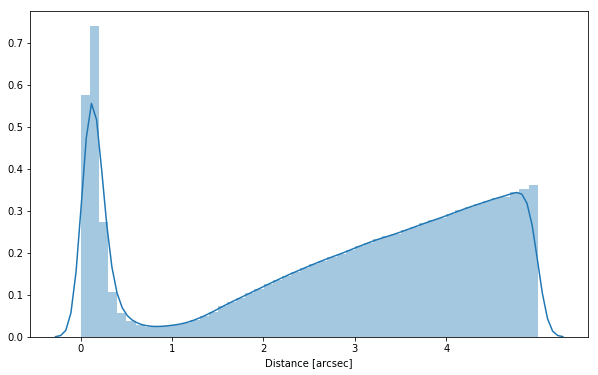

In [16]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(cfhtls_deep['cfhtls-deep_ra'], cfhtls_deep['cfhtls-deep_dec'])
)

In [17]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, 
                                    cfhtls_deep, 
                                    "cfhtls-deep_ra", 
                                    "cfhtls-deep_dec", 
                                    radius=0.8*u.arcsec)

### CFHTLenS

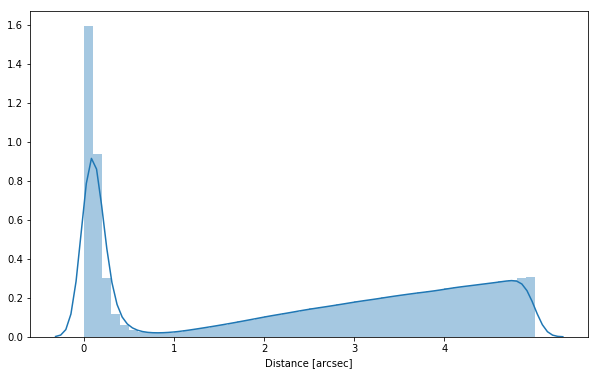

In [18]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(cfhtlens['cfhtlens_ra'], cfhtlens['cfhtlens_dec'])
)

In [19]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, cfhtlens, "cfhtlens_ra", "cfhtlens_dec", radius=0.8*u.arcsec)

### DEEP2

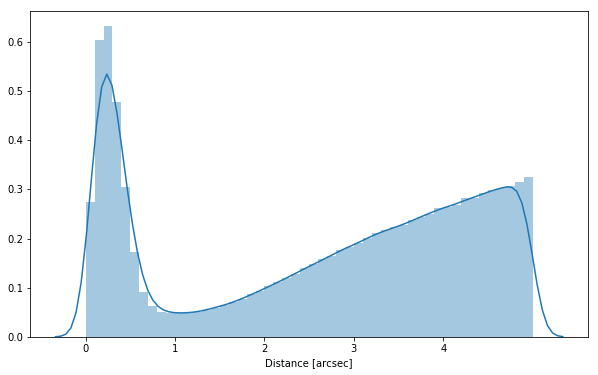

In [20]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(deep['deep2_ra'], deep['deep2_dec'])
)

In [21]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, deep, "deep2_ra", "deep2_dec", radius=0.8*u.arcsec)

### IRAC-EGS

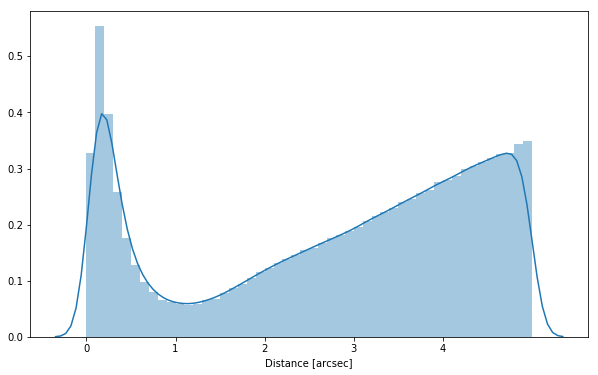

In [22]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(irac['irac-egs_ra'], irac['irac-egs_dec'])
)

In [23]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, irac, "irac-egs_ra", "irac-egs_dec", radius=0.8*u.arcsec)

### Legacy Survey

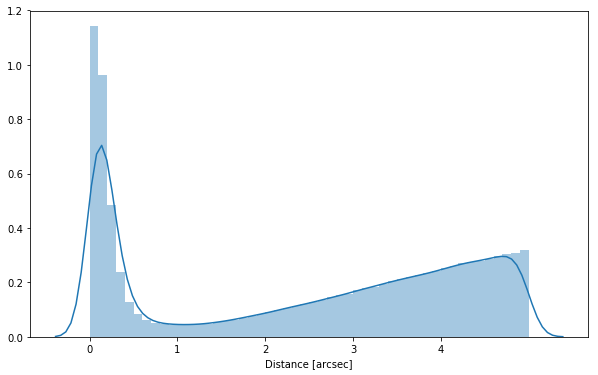

In [24]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(legacy['legacy_ra'], legacy['legacy_dec'])
)

In [25]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, legacy, "legacy_ra", "legacy_dec", radius=0.8*u.arcsec)

### UHS

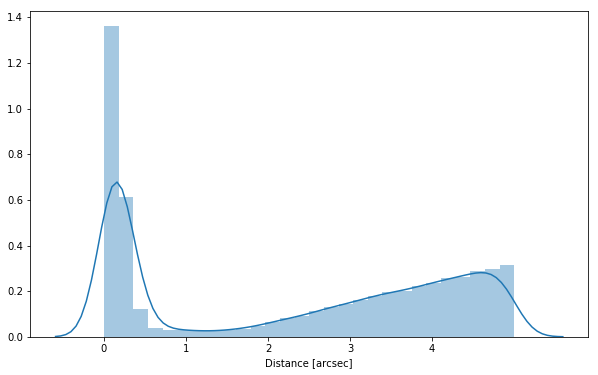

In [26]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(uhs['uhs_ra'], uhs['uhs_dec'])
)

In [27]:
# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(master_catalogue, uhs, "uhs_ra", "uhs_dec", radius=0.8*u.arcsec)

### Cleaning

When we merge the catalogues, astropy masks the non-existent values (e.g. when a row comes only from a catalogue and has no counterparts in the other, the columns from the latest are masked for that row). We indicate to use NaN for masked values for floats columns, False for flag columns and -1 for ID columns.

In [28]:
for col in master_catalogue.colnames:
    if "m_" in col or "merr_" in col or "f_" in col or "ferr_" in col or "stellarity" in col:
        master_catalogue[col].fill_value = np.nan
    elif "flag" in col:
        master_catalogue[col].fill_value = 0
    elif "id" in col:
        master_catalogue[col].fill_value = -1
        
master_catalogue = master_catalogue.filled()

In [29]:
master_catalogue[:10].show_in_notebook()

idx,hsc_id,ra,dec,m_ap_suprime_g,merr_ap_suprime_g,m_suprime_g,merr_suprime_g,m_ap_suprime_r,merr_ap_suprime_r,m_suprime_r,merr_suprime_r,m_ap_suprime_i,merr_ap_suprime_i,m_suprime_i,merr_suprime_i,m_ap_suprime_z,merr_ap_suprime_z,m_suprime_z,merr_suprime_z,m_ap_suprime_y,merr_ap_suprime_y,m_suprime_y,merr_suprime_y,hsc_stellarity,f_ap_suprime_g,ferr_ap_suprime_g,f_suprime_g,ferr_suprime_g,flag_suprime_g,f_ap_suprime_r,ferr_ap_suprime_r,f_suprime_r,ferr_suprime_r,flag_suprime_r,f_ap_suprime_i,ferr_ap_suprime_i,f_suprime_i,ferr_suprime_i,flag_suprime_i,f_ap_suprime_z,ferr_ap_suprime_z,f_suprime_z,ferr_suprime_z,flag_suprime_z,f_ap_suprime_y,ferr_ap_suprime_y,f_suprime_y,ferr_suprime_y,flag_suprime_y,hsc_flag_cleaned,hsc_flag_gaia,flag_merged,ps1_id,m_ap_gpc1_g,merr_ap_gpc1_g,m_gpc1_g,merr_gpc1_g,m_ap_gpc1_r,merr_ap_gpc1_r,m_gpc1_r,merr_gpc1_r,m_ap_gpc1_i,merr_ap_gpc1_i,m_gpc1_i,merr_gpc1_i,m_ap_gpc1_z,merr_ap_gpc1_z,m_gpc1_z,merr_gpc1_z,m_ap_gpc1_y,merr_ap_gpc1_y,m_gpc1_y,merr_gpc1_y,f_ap_gpc1_g,ferr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,flag_gpc1_y,ps1_flag_cleaned,ps1_flag_gaia,aegis_id,m_aegis_k,merr_aegis_k,m_ap_aegis_k,merr_ap_aegis_k,m_ap_aegis_j,merr_ap_aegis_j,f_aegis_k,ferr_aegis_k,flag_aegis_k,f_ap_aegis_k,ferr_ap_aegis_k,f_ap_aegis_j,ferr_ap_aegis_j,m_aegis_j,merr_aegis_j,f_aegis_j,ferr_aegis_j,flag_aegis_j,aegis_flag_cleaned,aegis_flag_gaia,candels-egs_id,candels-egs_stellarity,f_ap_acs_f606w,ferr_ap_acs_f606w,f_acs_f606w,ferr_acs_f606w,f_ap_acs_f814w,ferr_ap_acs_f814w,f_acs_f814w,ferr_acs_f814w,f_ap_wfc3_f125w,ferr_ap_wfc3_f125w,f_wfc3_f125w,ferr_wfc3_f125w,f_ap_wfc3_f140w,ferr_ap_wfc3_f140w,f_wfc3_f140w,ferr_wfc3_f140w,f_ap_wfc3_f160w,ferr_ap_wfc3_f160w,f_wfc3_f160w,ferr_wfc3_f160w,f_candels-megacam_u,ferr_candels-megacam_u,f_candels-megacam_g,ferr_candels-megacam_g,f_candels-megacam_r,ferr_candels-megacam_r,f_candels-megacam_i,ferr_candels-megacam_i,f_candels-megacam_z,ferr_candels-megacam_z,f_candels-wircam_j,ferr_candels-wircam_j,f_candels-wircam_h,ferr_candels-wircam_h,f_candels-wircam_k,ferr_candels-wircam_k,f_candels-newfirm_j1,ferr_candels-newfirm_j1,f_candels-newfirm_j2,ferr_candels-newfirm_j2,f_candels-newfirm_j3,ferr_candels-newfirm_j3,f_candels-newfirm_h1,ferr_candels-newfirm_h1,f_candels-newfirm_h2,ferr_candels-newfirm_h2,f_candels-newfirm_k,ferr_candels-newfirm_k,f_candels-irac_i1,ferr_candels-irac_i1,f_candels-irac_i2,ferr_candels-irac_i2,f_candels-irac_i3,ferr_candels-irac_i3,f_candels-irac_i4,ferr_candels-irac_i4,m_ap_acs_f606w,merr_ap_acs_f606w,m_acs_f606w,merr_acs_f606w,flag_acs_f606w,m_ap_acs_f814w,merr_ap_acs_f814w,m_acs_f814w,merr_acs_f814w,flag_acs_f814w,m_ap_wfc3_f125w,merr_ap_wfc3_f125w,m_wfc3_f125w,merr_wfc3_f125w,flag_wfc3_f125w,m_ap_wfc3_f140w,merr_ap_wfc3_f140w,m_wfc3_f140w,merr_wfc3_f140w,flag_wfc3_f140w,m_ap_wfc3_f160w,merr_ap_wfc3_f160w,m_wfc3_f160w,merr_wfc3_f160w,flag_wfc3_f160w,m_candels-megacam_u,merr_candels-megacam_u,m_ap_candels-megacam_u,merr_ap_candels-megacam_u,f_ap_candels-megacam_u,ferr_ap_candels-megacam_u,flag_candels-megacam_u,m_candels-megacam_g,merr_candels-megacam_g,m_ap_candels-megacam_g,merr_ap_candels-megacam_g,f_ap_candels-megacam_g,ferr_ap_candels-megacam_g,flag_candels-megacam_g,m_candels-megacam_r,merr_candels-megacam_r,m_ap_candels-megacam_r,merr_ap_candels-megacam_r,f_ap_candels-megacam_r,ferr_ap_candels-megacam_r,flag_candels-megacam_r,m_candels-megacam_i,merr_candels-megacam_i,m_ap_candels-megacam_i,merr_ap_candels-megacam_i,f_ap_candels-megacam_i,ferr_ap_candels-megacam_i,flag_candels-megacam_i,m_candels-megacam_z,merr_candels-megacam_z,m_ap_candels-megacam_z,merr_ap_candels-megacam_z,f_ap_candels-megacam_z,ferr_ap_candels-megacam_z,flag_candels-megacam_z,m_candels-wircam_j,merr_candels-wircam_j,m_ap_candels-wircam_j,merr_ap_

## III - Merging flags and stellarity

Each pristine catalogue contains a flag indicating if the source was associated to a another nearby source that was removed during the cleaning process.  We merge these flags in a single one.

In [30]:
flag_cleaned_columns = [column for column in master_catalogue.colnames
                        if 'flag_cleaned' in column]

flag_column = np.zeros(len(master_catalogue), dtype=bool)
for column in flag_cleaned_columns:
    flag_column |= master_catalogue[column]
    
master_catalogue.add_column(Column(data=flag_column, name="flag_cleaned"))
master_catalogue.remove_columns(flag_cleaned_columns)

Each pristine catalogue contains a flag indicating the probability of a source being a Gaia object (0: not a Gaia object, 1: possibly, 2: probably, 3: definitely).  We merge these flags taking the highest value.

In [31]:
flag_gaia_columns = [column for column in master_catalogue.colnames
                     if 'flag_gaia' in column]

master_catalogue.add_column(Column(
    data=np.max([master_catalogue[column] for column in flag_gaia_columns], axis=0),
    name="flag_gaia"
))
master_catalogue.remove_columns(flag_gaia_columns)

Each prisitine catalogue may contain one or several stellarity columns indicating the probability (0 to 1) of each source being a star.  We merge these columns taking the highest value.  We keep trace of the origin of the stellarity.

In [32]:
stellarity_columns = [column for column in master_catalogue.colnames
                      if 'stellarity' in column]

print(", ".join(stellarity_columns))

hsc_stellarity, candels-egs_stellarity, cfhtls-wide_stellarity, cfhtls-deep_stellarity, cfhtlens_stellarity, legacy_stellarity, uhs_stellarity


In [33]:
# We create an masked array with all the stellarities and get the maximum value, as well as its
# origin.  Some sources may not have an associated stellarity.
stellarity_array = np.array([master_catalogue[column] for column in stellarity_columns])
stellarity_array = np.ma.masked_array(stellarity_array, np.isnan(stellarity_array))

max_stellarity = np.max(stellarity_array, axis=0)
max_stellarity.fill_value = np.nan

no_stellarity_mask = max_stellarity.mask

master_catalogue.add_column(Column(data=max_stellarity.filled(), name="stellarity"))

stellarity_origin = np.full(len(master_catalogue), "NO_INFORMATION", dtype="S20")
stellarity_origin[~no_stellarity_mask] = np.array(stellarity_columns)[np.argmax(stellarity_array, axis=0)[~no_stellarity_mask]]

master_catalogue.add_column(Column(data=stellarity_origin, name="stellarity_origin"))

master_catalogue.remove_columns(stellarity_columns)

## IV - Adding E(B-V) column

In [34]:
master_catalogue.add_column(
    ebv(master_catalogue['ra'], master_catalogue['dec'])
)

## V - Adding HELP unique identifiers and field columns

In [35]:
master_catalogue.add_column(Column(gen_help_id(master_catalogue['ra'], master_catalogue['dec']),
                                   name="help_id"))
master_catalogue.add_column(Column(np.full(len(master_catalogue), "EGS", dtype='<U18'),
                                   name="field"))

In [36]:
# Check that the HELP Ids are unique
if len(master_catalogue) != len(np.unique(master_catalogue['help_id'])):
    print("The HELP IDs are not unique!!!")
else:
    print("OK!")

OK!


## VI - Cross-matching with spec-z catalogue

In [37]:
specz =  Table.read("../../dmu23/dmu23_EGS/data/EGS-specz-v2.1.csv")
for col in specz.colnames:
    specz[col].name = specz[col].name.lower()

specz['objid'].name = 'specz_id'


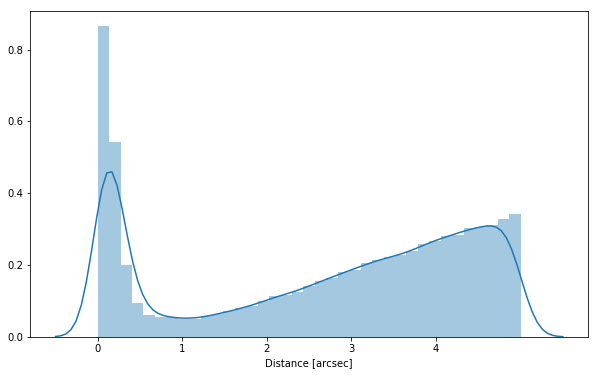

In [38]:
nb_merge_dist_plot(
    SkyCoord(master_catalogue['ra'], master_catalogue['dec']),
    SkyCoord(specz['ra'] * u.deg, specz['dec'] * u.deg)
)

In [39]:
master_catalogue = specz_merge(master_catalogue, specz, radius=1. * u.arcsec)

## VII - Choosing between multiple values for the same filter

There are many different bands to choose between here.

### CFHT Megacam

CFHT-WIRDS is the only survey that has J, H and Ks so we take them directly. After that we need to select ugriz bands from between CFHTLS, CFHT-WIRDS and CFHTLenS. We take these in order of depth.

|  Survey     | Bands         | Notes|
|:------------|:--------------|:-----|
| CFHTLS-DEEP | u, g, r, i, z |      |
| CFHTLS-WIDE | u, g, r, i, z |      |
| CFHT-WIRDS  | u, g, r, i, z | Ks selected so may have unique objects       |
| CFHTLenS    | u, g, r, i, z | Reprocessing of CFHTLS-WIDE so not used      |
| CANDELS-EGS | u, g, r, i, z | Priors from very deep data so may have unique objects     |
| IRAC-EGS | u, g, r, i, z | Priors from IRAC so may have unique objects     |

In [40]:
megacam_origin = Table()
megacam_origin.add_column(master_catalogue['help_id'])

In [41]:
megacam_stats = Table()
megacam_stats.add_column(Column(data=['u','g','r','i','z'], name="Band"))
for col in ["CFHTLS-DEEP", "CFHTLS-WIDE", "CFHT-WIRDS", "CFHTLenS", "CANDELS", "IRAC-EGS"]:
    megacam_stats.add_column(Column(data=np.full(5, 0), name="{}".format(col)))
    megacam_stats.add_column(Column(data=np.full(5, 0), name="use {}".format(col)))
    megacam_stats.add_column(Column(data=np.full(5, 0), name="{} ap".format(col)))
    megacam_stats.add_column(Column(data=np.full(5, 0), name="use {} ap".format(col)))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(5, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [42]:
megacam_bands = ['u','g','r','i','z'] 
for band in megacam_bands:

    # Megacam total flux 
    has_cfhtls_deep = ~np.isnan(master_catalogue['f_cfhtls-deep_' + band])
    has_cfhtls_wide = ~np.isnan(master_catalogue['f_cfhtls-wide_' + band])
    has_wirds = ~np.isnan(master_catalogue['f_wirds_' + band])
    has_cfhtlens = ~np.isnan(master_catalogue['f_cfhtlens_' + band])
    has_candels = ~np.isnan(master_catalogue['f_candels-megacam_' + band])
    has_irac = ~np.isnan(master_catalogue['f_irac-megacam_' + band])
    

    use_cfhtls_deep = has_cfhtls_deep 
    use_cfhtls_wide = has_cfhtls_wide & ~has_cfhtls_deep 
    use_wirds =       has_wirds       & ~has_cfhtls_deep & ~has_cfhtls_wide  
    use_cfhtlens =    np.zeros(len(master_catalogue), dtype=bool) #We still merge CFHTLenS to keep ids in cross id
    use_candels =     has_candels     & ~has_cfhtls_deep & ~has_cfhtls_wide & ~has_wirds & ~has_cfhtlens 
    use_irac = has_irac &~has_candels     & ~has_cfhtls_deep & ~has_cfhtls_wide & ~has_wirds & ~has_cfhtlens 

    f_megacam = np.full(len(master_catalogue), np.nan)
    f_megacam[use_cfhtls_deep] = master_catalogue['f_cfhtls-deep_' + band][use_cfhtls_deep]
    f_megacam[use_cfhtls_wide] = master_catalogue['f_cfhtls-wide_' + band][use_cfhtls_wide]
    f_megacam[use_wirds] = master_catalogue['f_wirds_' + band][use_wirds]
    f_megacam[use_cfhtlens] = master_catalogue['f_cfhtlens_' + band][use_cfhtlens]
    f_megacam[use_candels] = master_catalogue['f_candels-megacam_' + band][use_candels]
    f_megacam[use_irac] = master_catalogue['f_irac-megacam_' + band][use_irac]

    ferr_megacam = np.full(len(master_catalogue), np.nan)
    ferr_megacam[use_cfhtls_deep] = master_catalogue['ferr_cfhtls-deep_' + band][use_cfhtls_deep]
    ferr_megacam[use_cfhtls_wide] = master_catalogue['ferr_cfhtls-wide_' + band][use_cfhtls_wide]
    ferr_megacam[use_wirds] = master_catalogue['ferr_wirds_' + band][use_wirds]
    ferr_megacam[use_cfhtlens] = master_catalogue['ferr_cfhtlens_' + band][use_cfhtlens]
    ferr_megacam[use_candels] = master_catalogue['ferr_candels-megacam_' + band][use_candels]
    ferr_megacam[use_irac] = master_catalogue['ferr_irac-megacam_' + band][use_irac]
    
    m_megacam = np.full(len(master_catalogue), np.nan)
    m_megacam[use_cfhtls_deep] = master_catalogue['m_cfhtls-deep_' + band][use_cfhtls_deep]
    m_megacam[use_cfhtls_wide] = master_catalogue['m_cfhtls-wide_' + band][use_cfhtls_wide]
    m_megacam[use_wirds] = master_catalogue['m_wirds_' + band][use_wirds]
    m_megacam[use_cfhtlens] = master_catalogue['m_cfhtlens_' + band][use_cfhtlens]
    m_megacam[use_candels] = master_catalogue['m_candels-megacam_' + band][use_candels]
    m_megacam[use_irac] = master_catalogue['m_irac-megacam_' + band][use_irac]

    merr_megacam = np.full(len(master_catalogue), np.nan)
    merr_megacam[use_cfhtls_deep] = master_catalogue['merr_cfhtls-deep_' + band][use_cfhtls_deep]
    merr_megacam[use_cfhtls_wide] = master_catalogue['merr_cfhtls-wide_' + band][use_cfhtls_wide]
    merr_megacam[use_wirds] = master_catalogue['merr_wirds_' + band][use_wirds]
    merr_megacam[use_cfhtlens] = master_catalogue['merr_cfhtlens_' + band][use_cfhtlens]
    merr_megacam[use_candels] = master_catalogue['merr_candels-megacam_' + band][use_candels]
    merr_megacam[use_irac] = master_catalogue['merr_irac-megacam_' + band][use_irac]

    flag_megacam = np.full(len(master_catalogue), False, dtype=bool)
    flag_megacam[use_cfhtls_deep] = master_catalogue['flag_cfhtls-deep_' + band][use_cfhtls_deep]
    flag_megacam[use_cfhtls_wide] = master_catalogue['flag_cfhtls-wide_' + band][use_cfhtls_wide]
    flag_megacam[use_wirds] = master_catalogue['flag_wirds_' + band][use_wirds]
    flag_megacam[use_cfhtlens] = master_catalogue['flag_cfhtlens_' + band][use_cfhtlens]
    flag_megacam[use_candels] = master_catalogue['flag_candels-megacam_' + band][use_candels]
    flag_megacam[use_irac] = master_catalogue['flag_irac-megacam_' + band][use_irac]

    master_catalogue.add_column(Column(data=f_megacam, name="f_megacam_" + band))
    master_catalogue.add_column(Column(data=ferr_megacam, name="ferr_megacam_" + band))
    master_catalogue.add_column(Column(data=m_megacam, name="m_megacam_" + band))
    master_catalogue.add_column(Column(data=merr_megacam, name="merr_megacam_" + band))
    master_catalogue.add_column(Column(data=flag_megacam, name="flag_megacam_" + band))

    old_columns = ['f_cfhtls-deep_' + band,
                    'ferr_cfhtls-deep_' + band,
                    'm_cfhtls-deep_' + band, 
                    'merr_cfhtls-deep_' + band,
                    'flag_cfhtls-deep_' + band,
                   'f_cfhtls-wide_' + band,
                    'ferr_cfhtls-wide_' + band,
                    'm_cfhtls-wide_' + band, 
                    'merr_cfhtls-wide_' + band,
                    'flag_cfhtls-wide_' + band,
                  'f_wirds_' + band,
                    'ferr_wirds_' + band,
                    'm_wirds_' + band, 
                    'merr_wirds_' + band,
                    'flag_wirds_' + band,
                  'f_cfhtlens_' + band,
                    'ferr_cfhtlens_' + band,
                    'm_cfhtlens_' + band, 
                    'merr_cfhtlens_' + band,
                    'flag_cfhtlens_' + band,
                  'f_candels-megacam_' + band,
                    'ferr_candels-megacam_' + band,
                    'm_candels-megacam_' + band, 
                    'merr_candels-megacam_' + band,
                    'flag_candels-megacam_' + band,
                  'f_irac-megacam_' + band,
                    'ferr_irac-megacam_' + band,
                    'm_irac-megacam_' + band, 
                    'merr_irac-megacam_' + band,
                    'flag_irac-megacam_' + band,]

    
    master_catalogue.remove_columns(old_columns)

    origin = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin[use_cfhtls_deep] = "CFHTLS-DEEP"
    origin[use_cfhtls_wide] = "CFHTLS-WIDE"
    origin[use_wirds] = "CFHT-WIRDS"
    origin[use_cfhtlens] = "CFHTLenS"
    origin[use_candels] = "CANDELS"
    origin[use_irac] = "IRAC-EGS"
    
    megacam_origin.add_column(Column(data=origin, name= 'f_megacam_' + band ))
    
    # Megacam aperture flux 
    has_ap_cfhtls_deep = ~np.isnan(master_catalogue['f_ap_cfhtls-deep_' + band])
    has_ap_cfhtls_wide = ~np.isnan(master_catalogue['f_ap_cfhtls-wide_' + band])
    has_ap_wirds = ~np.isnan(master_catalogue['f_ap_wirds_' + band])
    has_ap_cfhtlens = ~np.isnan(master_catalogue['f_ap_cfhtlens_' + band])
    has_ap_candels = ~np.isnan(master_catalogue['f_ap_candels-megacam_' + band])
    
    use_ap_cfhtls_deep = has_ap_cfhtls_deep
    use_ap_cfhtls_wide = has_ap_cfhtls_wide & ~has_ap_cfhtls_deep
    use_ap_wirds       = has_ap_wirds       & ~has_ap_cfhtls_deep & ~has_ap_cfhtls_wide
    use_ap_cfhtlens    = has_ap_cfhtlens    & ~has_ap_cfhtls_deep & ~has_ap_cfhtls_wide & ~has_ap_wirds   
    use_ap_candels     = has_ap_candels     & ~has_ap_cfhtls_deep & ~has_ap_cfhtls_wide & ~has_ap_wirds & ~has_ap_cfhtlens   

    f_ap_megacam = np.full(len(master_catalogue), np.nan)
    f_ap_megacam[use_ap_cfhtls_deep] = master_catalogue['f_ap_cfhtls-deep_' + band][use_ap_cfhtls_deep]
    f_ap_megacam[use_ap_cfhtls_wide] = master_catalogue['f_ap_cfhtls-wide_' + band][use_ap_cfhtls_wide]
    f_ap_megacam[use_ap_wirds] = master_catalogue['f_ap_wirds_' + band][use_ap_wirds]
    f_ap_megacam[use_ap_cfhtlens] = master_catalogue['f_ap_cfhtlens_' + band][use_ap_cfhtlens]
    f_ap_megacam[use_ap_candels] = master_catalogue['f_ap_candels-megacam_' + band][use_ap_candels]

    ferr_ap_megacam = np.full(len(master_catalogue), np.nan)
    ferr_ap_megacam[use_ap_cfhtls_deep] = master_catalogue['ferr_ap_cfhtls-deep_' + band][use_ap_cfhtls_deep]
    ferr_ap_megacam[use_ap_cfhtls_wide] = master_catalogue['ferr_ap_cfhtls-wide_' + band][use_ap_cfhtls_wide]
    ferr_ap_megacam[use_ap_wirds] = master_catalogue['ferr_ap_wirds_' + band][use_ap_wirds]
    ferr_ap_megacam[use_ap_cfhtlens] = master_catalogue['ferr_ap_cfhtlens_' + band][use_ap_cfhtlens]
    ferr_ap_megacam[use_ap_candels] = master_catalogue['ferr_ap_candels-megacam_' + band][use_ap_candels]
    
    m_ap_megacam = np.full(len(master_catalogue), np.nan)
    m_ap_megacam[use_ap_cfhtls_deep] = master_catalogue['m_ap_cfhtls-deep_' + band][use_ap_cfhtls_deep]
    m_ap_megacam[use_ap_cfhtls_wide] = master_catalogue['m_ap_cfhtls-wide_' + band][use_ap_cfhtls_wide]
    m_ap_megacam[use_ap_wirds] = master_catalogue['m_ap_wirds_' + band][use_ap_wirds]
    m_ap_megacam[use_ap_cfhtlens] = master_catalogue['m_ap_cfhtlens_' + band][use_ap_cfhtlens]
    m_ap_megacam[use_ap_candels] = master_catalogue['m_ap_candels-megacam_' + band][use_ap_candels]

    merr_ap_megacam = np.full(len(master_catalogue), np.nan)
    merr_ap_megacam[use_ap_cfhtls_deep] = master_catalogue['merr_ap_cfhtls-deep_' + band][use_ap_cfhtls_deep]
    merr_ap_megacam[use_ap_cfhtls_wide] = master_catalogue['merr_ap_cfhtls-wide_' + band][use_ap_cfhtls_wide]
    merr_ap_megacam[use_ap_wirds] = master_catalogue['merr_ap_wirds_' + band][use_ap_wirds]
    merr_ap_megacam[use_ap_cfhtlens] = master_catalogue['merr_ap_cfhtlens_' + band][use_ap_cfhtlens]
    merr_ap_megacam[use_ap_candels] = master_catalogue['merr_ap_candels-megacam_' + band][use_ap_candels]

    master_catalogue.add_column(Column(data=f_ap_megacam, name="f_ap_megacam_" + band))
    master_catalogue.add_column(Column(data=ferr_ap_megacam, name="ferr_ap_megacam_" + band))
    master_catalogue.add_column(Column(data=m_ap_megacam, name="m_ap_megacam_" + band))
    master_catalogue.add_column(Column(data=merr_ap_megacam, name="merr_ap_megacam_" + band))


    old_ap_columns = ['f_ap_cfhtls-deep_' + band,
                    'ferr_ap_cfhtls-deep_' + band,
                    'm_ap_cfhtls-deep_' + band, 
                    'merr_ap_cfhtls-deep_' + band,
                  'f_ap_cfhtls-wide_' + band,
                    'ferr_ap_cfhtls-wide_' + band,
                    'm_ap_cfhtls-wide_' + band, 
                    'merr_ap_cfhtls-wide_' + band,
                  'f_ap_wirds_' + band,
                    'ferr_ap_wirds_' + band,
                    'm_ap_wirds_' + band, 
                    'merr_ap_wirds_' + band,
                  'f_ap_cfhtlens_' + band,
                    'ferr_ap_cfhtlens_' + band,
                    'm_ap_cfhtlens_' + band, 
                    'merr_ap_cfhtlens_' + band,
                  'f_ap_candels-megacam_' + band,
                    'ferr_ap_candels-megacam_' + band,
                    'm_ap_candels-megacam_' + band, 
                    'merr_ap_candels-megacam_' + band]

    
    master_catalogue.remove_columns(old_ap_columns)

    origin_ap = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin_ap[use_ap_cfhtls_deep] = "CFHTLS-DEEP"
    origin_ap[use_ap_cfhtls_wide] = "CFHTLS-WIDE"
    origin_ap[use_ap_wirds] = "CFHT-WIRDS"
    origin_ap[use_ap_cfhtlens] = "CFHTLenS"
    origin_ap[use_ap_candels] = "CANDELS"
    
    megacam_origin.add_column(Column(data=origin_ap, name= 'f_ap_megacam_' + band ))
    

   
    megacam_stats['CFHTLS-DEEP'][megacam_stats['Band'] == band] = np.sum(has_cfhtls_deep)
    megacam_stats['CFHTLS-WIDE'][megacam_stats['Band'] == band] = np.sum(has_cfhtls_wide)
    megacam_stats['CFHT-WIRDS'][megacam_stats['Band'] == band] = np.sum(has_wirds)
    megacam_stats['CFHTLenS'][megacam_stats['Band'] == band] = np.sum(has_cfhtlens)
    megacam_stats['CANDELS'][megacam_stats['Band'] == band] = np.sum(has_candels)
    megacam_stats['use CFHTLS-DEEP'][megacam_stats['Band'] == band] = np.sum(use_cfhtls_deep)
    megacam_stats['use CFHTLS-WIDE'][megacam_stats['Band'] == band] = np.sum(use_cfhtls_wide)
    megacam_stats['use CFHT-WIRDS'][megacam_stats['Band'] == band] = np.sum(use_wirds)
    megacam_stats['use CFHTLenS'][megacam_stats['Band'] == band] = np.sum(use_cfhtlens)
    megacam_stats['use CANDELS'][megacam_stats['Band'] == band] = np.sum(use_candels)    
    megacam_stats['CFHTLS-DEEP ap'][megacam_stats['Band'] == band] = np.sum(has_ap_cfhtls_deep)
    megacam_stats['CFHTLS-WIDE ap'][megacam_stats['Band'] == band] = np.sum(has_ap_cfhtls_wide)
    megacam_stats['CFHT-WIRDS ap'][megacam_stats['Band'] == band] = np.sum(has_ap_wirds)
    megacam_stats['CFHTLenS ap'][megacam_stats['Band'] == band] = np.sum(has_ap_cfhtlens)
    megacam_stats['CANDELS ap'][megacam_stats['Band'] == band] = np.sum(has_ap_candels)
    megacam_stats['use CFHTLS-DEEP ap'][megacam_stats['Band'] == band] = np.sum(use_ap_cfhtls_deep)
    megacam_stats['use CFHTLS-WIDE ap'][megacam_stats['Band'] == band] = np.sum(use_ap_cfhtls_wide)
    megacam_stats['use CFHT-WIRDS ap'][megacam_stats['Band'] == band] = np.sum(use_ap_wirds)
    megacam_stats['use CFHTLenS ap'][megacam_stats['Band'] == band] = np.sum(use_ap_cfhtlens)
    megacam_stats['use CANDELS ap'][megacam_stats['Band'] == band] = np.sum(use_ap_candels)

In [43]:
megacam_stats.show_in_notebook()

idx,Band,CFHTLS-DEEP,use CFHTLS-DEEP,CFHTLS-DEEP ap,use CFHTLS-DEEP ap,CFHTLS-WIDE,use CFHTLS-WIDE,CFHTLS-WIDE ap,use CFHTLS-WIDE ap,CFHT-WIRDS,use CFHT-WIRDS,CFHT-WIRDS ap,use CFHT-WIRDS ap,CFHTLenS,use CFHTLenS,CFHTLenS ap,use CFHTLenS ap,CANDELS,use CANDELS,CANDELS ap,use CANDELS ap,IRAC-EGS,use IRAC-EGS,IRAC-EGS ap,use IRAC-EGS ap
0,u,462710.0,462710.0,466773.0,466773.0,672644.0,515912.0,686140.0,526685.0,85406.0,15360.0,85652.0,15000.0,321530.0,0.0,0.0,0.0,41449.0,14235.0,0.0,0.0,0.0,0.0,0.0,0.0
1,g,531957.0,531957.0,534321.0,534321.0,740867.0,568617.0,744387.0,571585.0,91050.0,16093.0,90419.0,15292.0,408054.0,0.0,0.0,0.0,41449.0,11609.0,0.0,0.0,0.0,0.0,0.0,0.0
2,r,543141.0,543141.0,546308.0,546308.0,735227.0,565264.0,742023.0,570390.0,91750.0,16283.0,91056.0,15446.0,402653.0,0.0,0.0,0.0,41449.0,11139.0,0.0,0.0,0.0,0.0,0.0,0.0
3,i,537151.0,537151.0,540837.0,540837.0,721821.0,553803.0,732290.0,562106.0,91903.0,16356.0,91175.0,15495.0,388011.0,0.0,0.0,0.0,41449.0,11235.0,0.0,0.0,0.0,0.0,0.0,0.0
4,z,475863.0,475863.0,482568.0,482568.0,650450.0,500464.0,673315.0,517921.0,89997.0,15702.0,89876.0,15082.0,350143.0,0.0,0.0,0.0,41449.0,13686.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
megacam_origin.write("{}/egs_megacam_fluxes_origins{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)

## CFHT WIRCAM

We have WIRCAM J,H, and Ks from both CFHT-WIRDS (Ks prior and blind) and CANDELS-EGS. Since the CANDELS will have very deep priors the WIRCAM fluxes are worth keepting to constrain photo-z. We therefor take the CFHT-WIRDS fluxes if they are there but keep all the CANDELS fluxes for sources that only have those.

In [45]:
wircam_origin = Table()
wircam_origin.add_column(master_catalogue['help_id'])

In [46]:
wircam_stats = Table()
wircam_stats.add_column(Column(data=['j', 'h', 'k'], name="Band"))
for col in ["CFHT-WIRDS", "CANDELS"]:
    wircam_stats.add_column(Column(data=np.full(3, 0), name="{}".format(col)))
    wircam_stats.add_column(Column(data=np.full(3, 0), name="use {}".format(col)))
    wircam_stats.add_column(Column(data=np.full(3, 0), name="{} ap".format(col)))
    wircam_stats.add_column(Column(data=np.full(3, 0), name="use {} ap".format(col)))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(3, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [47]:
wircam_bands = ['j', 'h', 'k'] 
for band in wircam_bands:

    # wircam total flux 
    has_wirds = ~np.isnan(master_catalogue['f_wirds_' + band])
    has_candels = ~np.isnan(master_catalogue['f_candels-wircam_' + band])
    
    use_wirds =       has_wirds        
    use_candels =     has_candels & ~has_wirds 

    f_wircam = np.full(len(master_catalogue), np.nan)
    f_wircam[use_wirds] = master_catalogue['f_wirds_' + band][use_wirds]
    f_wircam[use_candels] = master_catalogue['f_candels-wircam_' + band][use_candels]

    ferr_wircam = np.full(len(master_catalogue), np.nan)
    ferr_wircam[use_wirds] = master_catalogue['ferr_wirds_' + band][use_wirds]
    ferr_wircam[use_candels] = master_catalogue['ferr_candels-wircam_' + band][use_candels]
    
    m_wircam = np.full(len(master_catalogue), np.nan)
    m_wircam[use_wirds] = master_catalogue['m_wirds_' + band][use_wirds]
    m_wircam[use_candels] = master_catalogue['m_candels-wircam_' + band][use_candels]

    merr_wircam = np.full(len(master_catalogue), np.nan)
    merr_wircam[use_wirds] = master_catalogue['merr_wirds_' + band][use_wirds]
    merr_wircam[use_candels] = master_catalogue['merr_candels-wircam_' + band][use_candels]

    flag_wircam = np.full(len(master_catalogue), False, dtype=bool)
    flag_wircam[use_wirds] = master_catalogue['flag_wirds_' + band][use_wirds]
    flag_wircam[use_candels] = master_catalogue['flag_candels-wircam_' + band][use_candels]

    master_catalogue.add_column(Column(data=f_wircam, name="f_wircam_" + band))
    master_catalogue.add_column(Column(data=ferr_wircam, name="ferr_wircam_" + band))
    master_catalogue.add_column(Column(data=m_wircam, name="m_wircam_" + band))
    master_catalogue.add_column(Column(data=merr_wircam, name="merr_wircam_" + band))
    master_catalogue.add_column(Column(data=flag_wircam, name="flag_wircam_" + band))

    old_columns = ['f_wirds_' + band,
                    'ferr_wirds_' + band,
                    'm_wirds_' + band, 
                    'merr_wirds_' + band,
                    'flag_wirds_' + band,
                  'f_candels-wircam_' + band,
                    'ferr_candels-wircam_' + band,
                    'm_candels-wircam_' + band, 
                    'merr_candels-wircam_' + band,
                    'flag_candels-wircam_' + band,]

    
    master_catalogue.remove_columns(old_columns)

    origin = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin[use_wirds] = "CFHT-WIRDS"
    origin[use_candels] = "CANDELS"
    
    wircam_origin.add_column(Column(data=origin, name= 'f_wircam_' + band ))
    
    # wircam aperture flux 
    has_ap_wirds = ~np.isnan(master_catalogue['f_ap_wirds_' + band])
    has_ap_candels = ~np.isnan(master_catalogue['f_ap_candels-wircam_' + band])
    
    use_ap_wirds       = has_ap_wirds      
    use_ap_candels     = has_ap_candels     & ~has_ap_wirds  

    f_ap_wircam = np.full(len(master_catalogue), np.nan)
    f_ap_wircam[use_ap_wirds] = master_catalogue['f_ap_wirds_' + band][use_ap_wirds]
    f_ap_wircam[use_ap_candels] = master_catalogue['f_ap_candels-wircam_' + band][use_ap_candels]

    ferr_ap_wircam = np.full(len(master_catalogue), np.nan)
    ferr_ap_wircam[use_ap_wirds] = master_catalogue['ferr_ap_wirds_' + band][use_ap_wirds]
    ferr_ap_wircam[use_ap_candels] = master_catalogue['ferr_ap_candels-wircam_' + band][use_ap_candels]
    
    m_ap_wircam = np.full(len(master_catalogue), np.nan)
    m_ap_wircam[use_ap_wirds] = master_catalogue['m_ap_wirds_' + band][use_ap_wirds]
    m_ap_wircam[use_ap_candels] = master_catalogue['m_ap_candels-wircam_' + band][use_ap_candels]

    merr_ap_wircam = np.full(len(master_catalogue), np.nan)
    merr_ap_wircam[use_ap_wirds] = master_catalogue['merr_ap_wirds_' + band][use_ap_wirds]
    merr_ap_wircam[use_ap_candels] = master_catalogue['merr_ap_candels-wircam_' + band][use_ap_candels]

    master_catalogue.add_column(Column(data=f_ap_wircam, name="f_ap_wircam_" + band))
    master_catalogue.add_column(Column(data=ferr_ap_wircam, name="ferr_ap_wircam_" + band))
    master_catalogue.add_column(Column(data=m_ap_wircam, name="m_ap_wircam_" + band))
    master_catalogue.add_column(Column(data=merr_ap_wircam, name="merr_ap_wircam_" + band))


    old_ap_columns = ['f_ap_wirds_' + band,
                    'ferr_ap_wirds_' + band,
                    'm_ap_wirds_' + band, 
                    'merr_ap_wirds_' + band,
                  'f_ap_candels-wircam_' + band,
                    'ferr_ap_candels-wircam_' + band,
                    'm_ap_candels-wircam_' + band, 
                    'merr_ap_candels-wircam_' + band]

    
    master_catalogue.remove_columns(old_ap_columns)

    origin_ap = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin_ap[use_ap_wirds] = "CFHT-WIRDS"
    origin_ap[use_ap_candels] = "CANDELS"
    
    wircam_origin.add_column(Column(data=origin_ap, name= 'f_ap_wircam_' + band ))
    

   

    wircam_stats['CFHT-WIRDS'][wircam_stats['Band'] == band] = np.sum(has_wirds)
    wircam_stats['CANDELS'][wircam_stats['Band'] == band] = np.sum(has_candels)
    wircam_stats['use CFHT-WIRDS'][wircam_stats['Band'] == band] = np.sum(use_wirds)
    wircam_stats['use CANDELS'][wircam_stats['Band'] == band] = np.sum(use_candels)    
    wircam_stats['CFHT-WIRDS ap'][wircam_stats['Band'] == band] = np.sum(has_ap_wirds)
    wircam_stats['CANDELS ap'][wircam_stats['Band'] == band] = np.sum(has_ap_candels)
    wircam_stats['use CFHT-WIRDS ap'][wircam_stats['Band'] == band] = np.sum(use_ap_wirds)
    wircam_stats['use CANDELS ap'][wircam_stats['Band'] == band] = np.sum(use_ap_candels)

In [48]:
wircam_stats.show_in_notebook()

idx,Band,CFHT-WIRDS,use CFHT-WIRDS,CFHT-WIRDS ap,use CFHT-WIRDS ap,CANDELS,use CANDELS,CANDELS ap,use CANDELS ap
0,j,88730.0,88730.0,89464.0,89464.0,41449.0,31013.0,0.0,0.0
1,h,88563.0,88563.0,89226.0,89226.0,41449.0,30803.0,0.0,0.0
2,k,98224.0,98224.0,99097.0,99097.0,41449.0,30560.0,0.0,0.0


In [49]:
wircam_origin.write("{}/egs_wircam_fluxes_origins{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)

### IRAC

We have IRAC from the IRAC-EGS catalogue and from CANDELS. We take the CANDELS fluxes preferentially.

In [50]:
irac_origin = Table()
irac_origin.add_column(master_catalogue['help_id'])

In [51]:
irac_stats = Table()
irac_stats.add_column(Column(data=['i1', 'i2', 'i3', 'i4'], name="Band"))
for col in ["CANDELS", "IRAC-EGS"]:
    irac_stats.add_column(Column(data=np.full(4, 0), name="{}".format(col)))
    irac_stats.add_column(Column(data=np.full(4, 0), name="use {}".format(col)))
    irac_stats.add_column(Column(data=np.full(4, 0), name="{} ap".format(col)))
    irac_stats.add_column(Column(data=np.full(4, 0), name="use {} ap".format(col)))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(4, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [52]:
irac_bands = ['i1', 'i2', 'i3', 'i4'] 
for band in irac_bands:

    # IRAC total flux 
    has_candels = ~np.isnan(master_catalogue['f_candels-irac_' + band])
    has_irac = ~np.isnan(master_catalogue['f_irac-egs_' + band])
    
    
    use_candels =       has_candels       
    use_irac =     has_irac & ~has_candels

    f_irac = np.full(len(master_catalogue), np.nan)
    f_irac[use_candels] = master_catalogue['f_candels-irac_' + band][use_candels]
    f_irac[use_irac] = master_catalogue['f_irac-egs_' + band][use_irac]
    
    ferr_irac = np.full(len(master_catalogue), np.nan)
    ferr_irac[use_candels] = master_catalogue['ferr_candels-irac_' + band][use_candels]
    ferr_irac[use_irac] = master_catalogue['ferr_irac-egs_' + band][use_irac]
    
    m_irac = np.full(len(master_catalogue), np.nan)
    m_irac[use_candels] = master_catalogue['m_candels-irac_' + band][use_candels]
    m_irac[use_irac] = master_catalogue['m_irac-egs_' + band][use_irac]
    
    merr_irac = np.full(len(master_catalogue), np.nan)
    merr_irac[use_candels] = master_catalogue['merr_candels-irac_' + band][use_candels]
    merr_irac[use_irac] = master_catalogue['merr_irac-egs_' + band][use_irac]
    
    flag_irac = np.full(len(master_catalogue), False, dtype=bool)
    flag_irac[use_candels] = master_catalogue['flag_candels-irac_' + band][use_candels]
    flag_irac[use_irac] = master_catalogue['flag_irac-egs_' + band][use_irac]



    master_catalogue.add_column(Column(data=f_irac, name="f_irac_" + band))
    master_catalogue.add_column(Column(data=ferr_irac, name="ferr_irac_" + band))
    master_catalogue.add_column(Column(data=m_irac, name="m_irac_" + band))
    master_catalogue.add_column(Column(data=merr_irac, name="merr_irac_" + band))
    master_catalogue.add_column(Column(data=flag_irac, name="flag_irac_" + band))

    old_columns = ['f_candels-irac_' + band,
                    'ferr_candels-irac_' + band,
                    'm_candels-irac_' + band, 
                    'merr_candels-irac_' + band,
                    'flag_candels-irac_' + band,
                   'f_ap_candels-irac_' + band,
                    'ferr_ap_candels-irac_' + band,
                    'm_ap_candels-irac_' + band, 
                    'merr_ap_candels-irac_' + band,
                  'f_irac-egs_' + band,
                    'ferr_irac-egs_' + band,
                    'm_irac-egs_' + band, 
                    'merr_irac-egs_' + band,
                    'flag_irac-egs_' + band,]

    
    master_catalogue.remove_columns(old_columns)

    origin = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin[use_candels] = "CANDELS"
    origin[use_irac] = "IRAC-EGS"
    
    irac_origin.add_column(Column(data=origin, name= 'f_irac_' + band ))
    
  
 
    

   

    irac_stats['CANDELS'][irac_stats['Band'] == band] = np.sum(has_candels)
    irac_stats['IRAC-EGS'][irac_stats['Band'] == band] = np.sum(has_irac)
    irac_stats['use CANDELS'][irac_stats['Band'] == band] = np.sum(use_candels)
    irac_stats['use IRAC-EGS'][irac_stats['Band'] == band] = np.sum(use_irac)    


In [53]:
irac_stats.show_in_notebook()

idx,Band,CANDELS,use CANDELS,CANDELS ap,use CANDELS ap,IRAC-EGS,use IRAC-EGS,IRAC-EGS ap,use IRAC-EGS ap
0,i1,41449.0,41449.0,0.0,0.0,117929.0,105191.0,0.0,0.0
1,i2,41449.0,41449.0,0.0,0.0,114170.0,101586.0,0.0,0.0
2,i3,41449.0,41449.0,0.0,0.0,88315.0,78388.0,0.0,0.0
3,i4,41449.0,41449.0,0.0,0.0,83319.0,73956.0,0.0,0.0


In [54]:
irac_origin.write("{}/egs_irac_fluxes_origins{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)

### AEGIS
We have AEGIS (WIRCS instrument on Palomar telescope) data from the AEGIS catalogue and from IRAC-EGS. We take the AEGIS fluxes preferentially 

In [55]:
aegis_origin = Table()
aegis_origin.add_column(master_catalogue['help_id'])

In [56]:
aegis_stats = Table()
aegis_stats.add_column(Column(data=['j',  'k'], name="Band"))
for col in ["AEGIS", "IRAC-EGS"]:
    aegis_stats.add_column(Column(data=np.full(2, 0), name="{}".format(col)))
    aegis_stats.add_column(Column(data=np.full(2, 0), name="use {}".format(col)))
    aegis_stats.add_column(Column(data=np.full(2, 0), name="{} ap".format(col)))
    aegis_stats.add_column(Column(data=np.full(2, 0), name="use {} ap".format(col)))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(2, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [57]:
aegis_bands = ['j',  'k'] 
for band in aegis_bands:

    # wircam total flux 
    has_aegis = ~np.isnan(master_catalogue['f_aegis_' + band])
    has_irac = ~np.isnan(master_catalogue['f_irac-aegis_' + band])
    
    use_aegis =       has_aegis        
    use_irac =     has_irac & ~has_aegis

    f_aegis = np.full(len(master_catalogue), np.nan)
    f_aegis[use_aegis] = master_catalogue['f_aegis_' + band][use_aegis]
    f_aegis[use_irac] = master_catalogue['f_irac-aegis_' + band][use_irac]

    ferr_aegis = np.full(len(master_catalogue), np.nan)
    ferr_aegis[use_aegis] = master_catalogue['ferr_aegis_' + band][use_aegis]
    ferr_aegis[use_irac] = master_catalogue['ferr_irac-aegis_' + band][use_irac]
    
    m_aegis = np.full(len(master_catalogue), np.nan)
    m_aegis[use_aegis] = master_catalogue['m_aegis_' + band][use_aegis]
    m_aegis[use_irac] = master_catalogue['m_irac-aegis_' + band][use_irac]
    
    merr_aegis = np.full(len(master_catalogue), np.nan)
    merr_aegis[use_aegis] = master_catalogue['merr_aegis_' + band][use_aegis]
    merr_aegis[use_irac] = master_catalogue['merr_irac-aegis_' + band][use_irac]
    
    flag_aegis = np.full(len(master_catalogue), False, dtype=bool)
    flag_aegis[use_aegis] = master_catalogue['flag_aegis_' + band][use_aegis]
    flag_aegis[use_irac] = master_catalogue['flag_irac-aegis_' + band][use_irac]

    master_catalogue.add_column(Column(data=f_aegis, name="f_wircs_" + band))
    master_catalogue.add_column(Column(data=ferr_aegis, name="ferr_wircs_" + band))
    master_catalogue.add_column(Column(data=m_aegis, name="m_wircs_" + band))
    master_catalogue.add_column(Column(data=merr_aegis, name="merr_wircs_" + band))
    master_catalogue.add_column(Column(data=flag_aegis, name="flag_wircs_" + band))

    old_columns = ['f_aegis_' + band,
                    'ferr_aegis_' + band,
                    'm_aegis_' + band, 
                    'merr_aegis_' + band,
                    'flag_aegis_' + band,
                  'f_irac-aegis_' + band,
                    'ferr_irac-aegis_' + band,
                    'm_irac-aegis_' + band, 
                    'merr_irac-aegis_' + band,
                    'flag_irac-aegis_' + band,
                  ]
    
    if band == 'j':
        old_columns += ['f_ap_aegis_' + band,
                    'ferr_ap_aegis_' + band,
                    'm_ap_aegis_' + band, 
                    'merr_ap_aegis_' + band]

    
    master_catalogue.remove_columns(old_columns)

    origin = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin[use_aegis] = "AEGIS"
    origin[use_irac] = "IRAC-EGS"
    
    aegis_origin.add_column(Column(data=origin, name= 'f_wircs_' + band ))
    
    # wircam aperture flux 
    if band == 'k':
        
        has_ap_aegis = ~np.isnan(master_catalogue['f_ap_aegis_' + band])
        use_ap_aegis = has_ap_aegis
        
        master_catalogue.rename_column('f_ap_aegis_k', 'f_ap_wircs_k')
        master_catalogue.rename_column('ferr_ap_aegis_k', 'ferr_ap_wircs_k')
        master_catalogue.rename_column('m_ap_aegis_k', 'm_ap_wircs_k')
        master_catalogue.rename_column('merr_ap_aegis_k', 'merr_ap_wircs_k')
        
        origin_ap = np.full(len(master_catalogue), '     ', dtype='<U5')
        origin_ap[use_ap_aegis] = "AEGIS"
       
    
        aegis_origin.add_column(Column(data=origin_ap, name= 'f_ap_wircs_' + band ))
        aegis_stats['AEGIS ap'][aegis_stats['Band'] == band] = np.sum(has_ap_aegis)
        
        aegis_stats['use AEGIS ap'][aegis_stats['Band'] == band] = np.sum(use_ap_aegis)
        
    

   

    aegis_stats['AEGIS'][aegis_stats['Band'] == band] = np.sum(has_aegis)
    aegis_stats['IRAC-EGS'][aegis_stats['Band'] == band] = np.sum(has_irac)
    aegis_stats['use AEGIS'][aegis_stats['Band'] == band] = np.sum(use_aegis)
    aegis_stats['use IRAC-EGS'][aegis_stats['Band'] == band] = np.sum(use_irac)    
    

In [58]:
aegis_stats.show_in_notebook()

idx,Band,AEGIS,use AEGIS,AEGIS ap,use AEGIS ap,IRAC-EGS,use IRAC-EGS,IRAC-EGS ap,use IRAC-EGS ap
0,j,0.0,0.0,0.0,0.0,14575.0,14575.0,0.0,0.0
1,k,45065.0,45065.0,45065.0,45065.0,31115.0,2612.0,0.0,0.0


In [59]:
aegis_origin.write("{}/egs_aegis_fluxes_origins{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)

### HST: CANDELS vs IRAC-EGS
We take CANDELS over IRAC

In [60]:
hst_origin = Table()
hst_origin.add_column(master_catalogue['help_id'])

In [61]:
hst_stats = Table()
hst_stats.add_column(Column(data=['f814w',  'f606w'], name="Band"))
for col in ["CANDELS", "IRAC-EGS"]:
    hst_stats.add_column(Column(data=np.full(2, 0), name="{}".format(col)))
    hst_stats.add_column(Column(data=np.full(2, 0), name="use {}".format(col)))
    hst_stats.add_column(Column(data=np.full(2, 0), name="{} ap".format(col)))
    hst_stats.add_column(Column(data=np.full(2, 0), name="use {} ap".format(col)))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(2, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [62]:
hst_bands = ['f814w',  'f606w']

for band in hst_bands:

    # HST total flux 
    has_candels = ~np.isnan(master_catalogue['f_acs_' + band])
    has_irac = ~np.isnan(master_catalogue['f_irac-acs_' + band])
    
    use_candels =       has_candels        
    use_irac =     has_irac & ~has_candels

    master_catalogue['f_acs_' + band][use_irac] = master_catalogue['f_irac-acs_' + band][use_irac]
    master_catalogue['ferr_acs_' + band][use_irac] = master_catalogue['ferr_irac-acs_' + band][use_irac]
    master_catalogue['m_acs_' + band][use_irac] = master_catalogue['m_irac-acs_' + band][use_irac]
    master_catalogue['merr_acs_' + band][use_irac] = master_catalogue['merr_irac-acs_' + band][use_irac]
    master_catalogue['flag_acs_' + band][use_irac] = master_catalogue['flag_irac-acs_' + band][use_irac]

    old_columns = ['f_irac-acs_' + band,
                    'ferr_irac-acs_' + band,
                    'm_irac-acs_' + band, 
                    'merr_irac-acs_' + band,
                    'flag_irac-acs_' + band,]

    
    master_catalogue.remove_columns(old_columns)

    origin = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin[use_candels] = "CANDELS"
    origin[use_irac] = "IRAC-EGS"
    
    hst_origin.add_column(Column(data=origin, name= 'f_cfht12k_' + band ))
    

        
    

   

    hst_stats['CANDELS'][hst_stats['Band'] == band] = np.sum(has_candels)
    hst_stats['IRAC-EGS'][hst_stats['Band'] == band] = np.sum(has_irac)
    hst_stats['use CANDELS'][hst_stats['Band'] == band] = np.sum(use_candels)
    hst_stats['use IRAC-EGS'][hst_stats['Band'] == band] = np.sum(use_irac)    
    

In [63]:
hst_stats.show_in_notebook()

idx,Band,CANDELS,use CANDELS,CANDELS ap,use CANDELS ap,IRAC-EGS,use IRAC-EGS,IRAC-EGS ap,use IRAC-EGS ap
0,f814w,41449.0,41449.0,0.0,0.0,42891.0,30174.0,0.0,0.0
1,f606w,41449.0,41449.0,0.0,0.0,42908.0,30190.0,0.0,0.0


In [64]:
hst_origin.write("{}/egs_hst_fluxes_origins{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)

### CFHT12k : DEEP2 vs IRAC-EGS
We take DEEP2 preferentially

In [65]:
cfht12k_origin = Table()
cfht12k_origin.add_column(master_catalogue['help_id'])

In [66]:
cfht12k_stats = Table()
cfht12k_stats.add_column(Column(data=['b',  'r', 'i'], name="Band"))
for col in ["DEEP2", "IRAC-EGS"]:
    cfht12k_stats.add_column(Column(data=np.full(3, 0), name="{}".format(col)))
    cfht12k_stats.add_column(Column(data=np.full(3, 0), name="use {}".format(col)))
    cfht12k_stats.add_column(Column(data=np.full(3, 0), name="{} ap".format(col)))
    cfht12k_stats.add_column(Column(data=np.full(3, 0), name="use {} ap".format(col)))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(3, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [67]:
cfht12k_bands = ['b', 'r', 'i']

for band in cfht12k_bands:

    # cfht12k total flux 
    has_deep2 = ~np.isnan(master_catalogue['f_deep2_' + band])
    has_irac = ~np.isnan(master_catalogue['f_cfht12k_' + band])
    
    use_deep2 =       has_deep2        
    use_irac =     has_irac & ~has_deep2

    master_catalogue['f_cfht12k_' + band][use_deep2] = master_catalogue['f_deep2_' + band][use_deep2]
    master_catalogue['ferr_cfht12k_' + band][use_deep2] = master_catalogue['ferr_deep2_' + band][use_deep2]
    master_catalogue['m_cfht12k_' + band][use_deep2] = master_catalogue['m_deep2_' + band][use_deep2]
    master_catalogue['merr_cfht12k_' + band][use_deep2] = master_catalogue['merr_deep2_' + band][use_deep2]
    master_catalogue['flag_cfht12k_' + band][use_deep2] = master_catalogue['flag_deep2_' + band][use_deep2]

    old_columns = ['f_deep2_' + band,
                    'ferr_deep2_' + band,
                    'm_deep2_' + band, 
                    'merr_deep2_' + band,
                    'flag_deep2_' + band,
                   'f_ap_deep2_' + band,
                    'ferr_ap_deep2_' + band,
                    'm_ap_deep2_' + band, 
                    'merr_ap_deep2_' + band,]

    
    master_catalogue.remove_columns(old_columns)

    origin = np.full(len(master_catalogue), '     ', dtype='<U5')
    origin[use_deep2] = "DEEP2"
    origin[use_irac] = "IRAC-EGS"
    
    cfht12k_origin.add_column(Column(data=origin, name= 'f_cfht12k_' + band ))
    

        
    

   

    cfht12k_stats['DEEP2'][cfht12k_stats['Band'] == band] = np.sum(has_deep2)
    cfht12k_stats['IRAC-EGS'][cfht12k_stats['Band'] == band] = np.sum(has_irac)
    cfht12k_stats['use DEEP2'][cfht12k_stats['Band'] == band] = np.sum(use_deep2)
    cfht12k_stats['use IRAC-EGS'][cfht12k_stats['Band'] == band] = np.sum(use_irac)    
    

In [68]:
cfht12k_stats.show_in_notebook()

idx,Band,DEEP2,use DEEP2,DEEP2 ap,use DEEP2 ap,IRAC-EGS,use IRAC-EGS,IRAC-EGS ap,use IRAC-EGS ap
0,b,198734.0,198734.0,0.0,0.0,117310.0,57891.0,0.0,0.0
1,r,204151.0,204151.0,0.0,0.0,117245.0,56599.0,0.0,0.0
2,i,203829.0,203829.0,0.0,0.0,116751.0,56193.0,0.0,0.0


In [69]:
cfht12k_origin.write("{}/egs_cfht12k_fluxes_origins{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)

## VIII.a Wavelength domain coverage

We add a binary `flag_optnir_obs` indicating that a source was observed in a given wavelength domain:

- 1 for observation in optical;
- 2 for observation in near-infrared;
- 4 for observation in mid-infrared (IRAC).

It's an integer binary flag, so a source observed both in optical and near-infrared by not in mid-infrared would have this flag at 1 + 2 = 3.

*Note 1: The observation flag is based on the creation of multi-order coverage maps from the catalogues, this may not be accurate, especially on the edges of the coverage.*

*Note 2: Being on the observation coverage does not mean having fluxes in that wavelength domain. For sources observed in one domain but having no flux in it, one must take into consideration de different depths in the catalogue we are using.*

In [70]:
aegis_moc =  MOC(filename="../../dmu0/dmu0_AEGIS/data/EGS_Palomar_20160804_MOC.fits")
candels_moc =  MOC(filename="../../dmu0/dmu0_CANDELS-EGS/data/hlsp_candels_hst_wfc3_egs-tot-multiband_f160w_v1_MOC.fits")
wirds_moc =  MOC(filename="../../dmu0/dmu0_CFHT-WIRDS/data/EGS_Ks-priors_MOC.fits")
cfhtls_deep_moc =  MOC(filename="../../dmu0/dmu0_CFHTLS/data/CFHTLS-DEEP_EGS_MOC.fits")
cfhtls_wide_moc =  MOC(filename="../../dmu0/dmu0_CFHTLS/data/CFHTLS-WIDE_EGS_MOC.fits")
cfhtlens_moc =  MOC(filename="../../dmu0/dmu0_CFHTLenS/data/CFHTLenS_EGS_MOC.fits")
deep_moc =  MOC(filename="../../dmu0/dmu0_DEEP2/data/DEEP2_EGS_MOC.fits")
irac_moc =  MOC(filename="../../dmu0/dmu0_IRAC-EGS/data/IRAC_EGS_MOC.fits")
hsc_moc =  MOC(filename="../../dmu0/dmu0_HSC/data/HSC-PDR1_wide_EGS_MOC.fits")
ps1_moc =  MOC(filename="../../dmu0/dmu0_PanSTARRS1-3SS/data/PanSTARRS1-3SS_EGS_MOC.fits")
legacy_moc =  MOC(filename="../../dmu0/dmu0_LegacySurvey/data/LegacySurvey-dr4_EGS_MOC.fits")
uhs_moc =  MOC(filename="../../dmu0/dmu0_UHS/data/UHS-DR1_EGS_MOC.fits")

In [71]:
was_observed_optical = inMoc(
    master_catalogue['ra'], master_catalogue['dec'],
    aegis_moc + candels_moc + cfhtls_deep_moc + cfhtls_wide_moc + cfhtlens_moc + deep_moc + hsc_moc + ps1_moc + legacy_moc) 

was_observed_nir = inMoc(
    master_catalogue['ra'], master_catalogue['dec'],
    wirds_moc + uhs_moc 
)

was_observed_mir = inMoc(
    master_catalogue['ra'], master_catalogue['dec'],
    irac_moc
)

In [72]:
master_catalogue.add_column(
    Column(
        1 * was_observed_optical + 2 * was_observed_nir + 4 * was_observed_mir,
        name="flag_optnir_obs")
)

## VIII.b Wavelength domain detection

We add a binary `flag_optnir_det` indicating that a source was detected in a given wavelength domain:

- 1 for detection in optical;
- 2 for detection in near-infrared;
- 4 for detection in mid-infrared (IRAC).

It's an integer binary flag, so a source detected both in optical and near-infrared by not in mid-infrared would have this flag at 1 + 2 = 3.

*Note 1: We use the total flux columns to know if the source has flux, in some catalogues, we may have aperture flux and no total flux.*

To get rid of artefacts (chip edges, star flares, etc.) we consider that a source is detected in one wavelength domain when it has a flux value in **at least two bands**. That means that good sources will be excluded from this flag when they are on the coverage of only one band.

In [73]:
#Rename UHS to UKIDSS
replacements = [
    ['_uhs_j', '_ukidss_j'],
    ['_wircam_k', '_wircam_ks'],
    ['_candels-newfirm_', '_newfirm_'],
]
for col in master_catalogue.colnames:
    for rep in replacements:
        if rep[0] in col:
            master_catalogue.rename_column(col, col.replace(rep[0], rep[1]))
 

In [74]:

nb_optical_flux = (
#HSC
    1 * ~np.isnan(master_catalogue['f_suprime_g']) +
    1 * ~np.isnan(master_catalogue['f_suprime_r']) +
    1 * ~np.isnan(master_catalogue['f_suprime_i']) +
    1 * ~np.isnan(master_catalogue['f_suprime_z']) +
    1 * ~np.isnan(master_catalogue['f_suprime_y']) +
#PS1
    1 * ~np.isnan(master_catalogue['f_gpc1_g']) +
    1 * ~np.isnan(master_catalogue['f_gpc1_r']) +
    1 * ~np.isnan(master_catalogue['f_gpc1_i']) +
    1 * ~np.isnan(master_catalogue['f_gpc1_z']) +
    1 * ~np.isnan(master_catalogue['f_gpc1_y']) +
#Legacy Survey
    1 * ~np.isnan(master_catalogue['f_90prime_g']) +
    1 * ~np.isnan(master_catalogue['f_90prime_r']) +
    1 * ~np.isnan(master_catalogue['f_mosaic_z']) +
#CFHT
    1 * ~np.isnan(master_catalogue['f_megacam_u']) +
    1 * ~np.isnan(master_catalogue['f_megacam_g']) +
    1 * ~np.isnan(master_catalogue['f_megacam_r']) +
    1 * ~np.isnan(master_catalogue['f_megacam_i']) +
    1 * ~np.isnan(master_catalogue['f_megacam_z']) 

)

nb_nir_flux = (
    1 * ~np.isnan(master_catalogue['f_ukidss_j']) +
    1 * ~np.isnan(master_catalogue['f_wircam_j']) +
    1 * ~np.isnan(master_catalogue['f_wircam_h']) +
    1 * ~np.isnan(master_catalogue['f_wircam_ks']) 
    
)

nb_mir_flux = (
    1 * ~np.isnan(master_catalogue['f_irac_i1']) +
    1 * ~np.isnan(master_catalogue['f_irac_i2']) +
    1 * ~np.isnan(master_catalogue['f_irac_i3']) +
    1 * ~np.isnan(master_catalogue['f_irac_i4'])
)

In [75]:
has_optical_flux = nb_optical_flux >= 2
has_nir_flux = nb_nir_flux >= 2
has_mir_flux = nb_mir_flux >= 2

master_catalogue.add_column(
    Column(
        1 * has_optical_flux + 2 * has_nir_flux + 4 * has_mir_flux,
        name="flag_optnir_det")
)

## IX - Cross-identification table

We are producing a table associating to each HELP identifier, the identifiers of the sources in the pristine catalogues. This can be used to easily get additional information from them.

For convenience, we also cross-match the master list with the SDSS catalogue and add the objID associated with each source, if any. **TODO: should we correct the astrometry with respect to Gaia positions?**

In [76]:
#
# Addind SDSS ids
#
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_EGS.fits")['objID', 'ra', 'dec']
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)
idx_ml, d2d, _ = sdss_coords.match_to_catalog_sky(SkyCoord(master_catalogue['ra'], master_catalogue['dec']))
idx_sdss = np.arange(len(sdss))

# Limit the cross-match to 1 arcsec
mask = d2d <= 1. * u.arcsec
idx_ml = idx_ml[mask]
idx_sdss = idx_sdss[mask]
d2d = d2d[mask]
nb_orig_matches = len(idx_ml)

# In case of multiple associations of one master list object to an SDSS object, we keep only the
# association to the nearest one.
sort_idx = np.argsort(d2d)
idx_ml = idx_ml[sort_idx]
idx_sdss = idx_sdss[sort_idx]
_, unique_idx = np.unique(idx_ml, return_index=True)
idx_ml = idx_ml[unique_idx]
idx_sdss = idx_sdss[unique_idx]
print("{} master list rows had multiple associations.".format(nb_orig_matches - len(idx_ml)))

# Adding the ObjID to the master list
master_catalogue.add_column(Column(data=np.full(len(master_catalogue), -1, dtype='>i8'), name="sdss_id"))
master_catalogue['sdss_id'][idx_ml] = sdss['objID'][idx_sdss]

30 master list rows had multiple associations.


In [77]:

id_names = []
for col in master_catalogue.colnames:
    if '_id' in col:
        id_names += [col]
    if '_intid' in col:
        id_names += [col]
        
print(id_names)

['hsc_id', 'ps1_id', 'aegis_id', 'candels-egs_id', 'wirds_id', 'cfhtls-wide_id', 'cfhtls-deep_id', 'cfhtlens_id', 'deep2_id', 'irac-egs_id', 'legacy_id', 'uhs_id', 'help_id', 'specz_id', 'sdss_id']


In [78]:
master_catalogue[id_names].write(
    "{}/master_list_cross_ident_egs{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)
id_names.remove('help_id')
master_catalogue.remove_columns(id_names)

## X - Adding HEALPix index

We are adding a column with a HEALPix index at order 13 associated with each source.

In [79]:
master_catalogue.add_column(Column(
    data=coords_to_hpidx(master_catalogue['ra'], master_catalogue['dec'], order=13),
    name="hp_idx"
))

## XI - Saving the catalogue

In [80]:
columns = ["help_id", "field", "ra", "dec", "hp_idx"]

bands = [column[5:] for column in master_catalogue.colnames if 'f_ap' in column]
for band in bands:
    columns += ["f_ap_{}".format(band), "ferr_ap_{}".format(band),
                "m_ap_{}".format(band), "merr_ap_{}".format(band),
                "f_{}".format(band), "ferr_{}".format(band),
                "m_{}".format(band), "merr_{}".format(band),
                "flag_{}".format(band)]    
    
bands_tot_only = (set([column[2:] for column in master_catalogue.colnames if (column.startswith('f_') & ~column.startswith('f_ap_'))]) 
                  - set(bands))

for band in bands_tot_only:
    columns += ["f_{}".format(band), "ferr_{}".format(band),
                "m_{}".format(band), "merr_{}".format(band),
                "flag_{}".format(band)] 
    
columns += ["stellarity", "stellarity_origin", "flag_cleaned", "flag_merged", "flag_gaia", "flag_optnir_obs", 
            "flag_optnir_det", "zspec", "zspec_qual", "zspec_association_flag", "ebv"]

In [81]:
# We check for columns in the master catalogue that we will not save to disk.
print("Missing columns: {}".format(set(master_catalogue.colnames) - set(columns)))

Missing columns: set()


In [82]:
master_catalogue[columns].write("{}/master_catalogue_egs{}.fits".format(OUT_DIR, SUFFIX), overwrite=True)